In [1]:
import matplotlib.pyplot as plt
import os
import json

In [2]:
from datasets import SemiInat2021StrongAug

dataset = SemiInat2021StrongAug("/scratch/leco", levels=[0,1,2,3,4,5,6])

/scratch/leco/semi_inat already exists.


In [3]:
all_tp_info, leaf_idx_to_all_class_idx = dataset.get_class_hierarchy()
trainset, testset = dataset.get_dataset()

Animalia kingdom has 4 phylum
	Arthropoda phylum has 4 classes
		Insecta class has 10 orders
			Lepidoptera order has 21 family
				Erebidae family has 19 genus
					Sphingomorpha genus has 1 species
					Catocala genus has 4 species
					Macrobrochis genus has 1 species
					Ledaea genus has 1 species
					Halysidota genus has 1 species
					Seirarctia genus has 1 species
					Ophiusa genus has 1 species
					Olene genus has 1 species
					Asura genus has 1 species
					Diaphora genus has 1 species
					Zanclognatha genus has 1 species
					Spilosoma genus has 1 species
					Herminia genus has 1 species
					Grammodes genus has 1 species
					Cisthene genus has 1 species
					Forsebia genus has 1 species
					Chrysaeglia genus has 1 species
					Eudocima genus has 1 species
					Dasypodia genus has 1 species
				Choreutidae family has 1 genus
					Anthophila genus has 1 species
				Sphingidae family has 2 genus
					Hyles genus has 1 species
					Manduca genus has 1 species
				Noctui

In [4]:
from tqdm import tqdm
def get_labeled_class_count():
    labeled_class_count = {}
    for tp_info in all_tp_info:
        tp_name = tp_info['tp_name']
        print(f"Level ({tp_name})")
        labeled_class_count[tp_name] = {'train' : {}, 'test' : {}}
        tp_idx = tp_info['tp_idx']
        for name, sets in [['train', trainset], ['test', testset]]:
            print(f"\t{name}:")
            counter = {int(leaf_idx): 0 for leaf_idx in tp_info['idx_to_leaf_name']}
#             import ipdb; ipdb.set_trace()
            for _, label in tqdm(sets):
                leaf_idx = leaf_idx_to_all_class_idx[label][tp_idx]
#                 leaf_name = tp_info['idx_to_leaf_name'][leaf_idx]
                counter[int(leaf_idx)] += 1
            labeled_class_count[tp_name][name] = counter
    return labeled_class_count

labeled_class_count = get_labeled_class_count()

Level (kingdom)
	train:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101057/101057 [46:33<00:00, 36.17it/s]


	test:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4050/4050 [01:39<00:00, 40.69it/s]


Level (phylum)
	train:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101057/101057 [43:15<00:00, 38.93it/s]


	test:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4050/4050 [01:46<00:00, 37.88it/s]


Level (class)
	train:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101057/101057 [43:15<00:00, 38.94it/s]


	test:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4050/4050 [01:41<00:00, 39.93it/s]


Level (order)
	train:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101057/101057 [45:02<00:00, 37.39it/s]


	test:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4050/4050 [01:44<00:00, 38.88it/s]


Level (family)
	train:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101057/101057 [46:01<00:00, 36.60it/s]


	test:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4050/4050 [01:42<00:00, 39.50it/s]


Level (genus)
	train:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101057/101057 [47:41<00:00, 35.32it/s]


	test:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4050/4050 [01:54<00:00, 35.35it/s]


Level (species)
	train:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101057/101057 [44:55<00:00, 37.49it/s]


	test:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4050/4050 [01:32<00:00, 43.68it/s]


In [26]:
from copy import deepcopy
def ratio(counts):
    total = 0.
    for count in counts:
        total += counts[count]
    weight = 1/total
    for count in counts:
        counts[count] = weight * counts[count]
    return counts

def plot_labeled(tp_name, plot_type='ratio'):
    labeled_class_tp_train = deepcopy(labeled_class_count[tp_name]['train'])
    labeled_class_tp_test = deepcopy(labeled_class_count[tp_name]['test'])
    
    if plot_type=='ratio':
        labeled_class_tp_train = ratio(labeled_class_tp_train)
        labeled_class_tp_test = ratio(labeled_class_tp_test)
#     import pdb; pdb.set_trace()
    sorted_indices = sorted(list(labeled_class_tp_train.keys()), key=lambda x: labeled_class_tp_train[x], reverse=True)
    
    plot_curve = {
        'train' : [labeled_class_tp_train[i] for i in sorted_indices],
        'test' : [labeled_class_tp_test[i] for i in sorted_indices],
    }
    
    colors = ['red', 'blue']
    for idx, curve_name in enumerate(plot_curve):
        curve = plot_curve[curve_name]
        color = colors[idx]
        plt.plot(curve, label=curve_name)
#     plt.yticks([0, 0.5, 1])
#     plt.xticks(list(range(len(sorted_indices))))
    max_count = plot_curve['train'][0]
    min_count = plot_curve['train'][-1]
    
    max_ratio = max(plot_curve['train'][0], plot_curve['test'][0])
#     print(max_ratio)
    if plot_type=='ratio':
        plt.ylabel('Class ratio')
        plt.ylim(0, max_ratio+0.1*max_ratio)
        plt.title(tp_name + f" (Max {max_count:.5f}, Min {min_count:.5f})")
    else:
        plt.ylabel(f'Num of Samples')
        plt.ylim(0, max_ratio)
        plt.title(tp_name + f" (Max {max_count}, Min {min_count})")
    plt.legend()
    plt.show()


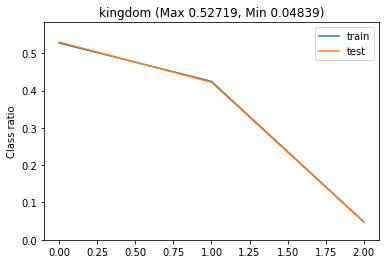

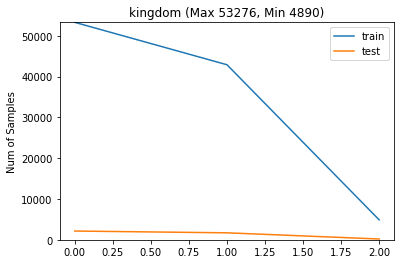

In [27]:
plot_labeled('kingdom')
plot_labeled('kingdom', plot_type='sample')


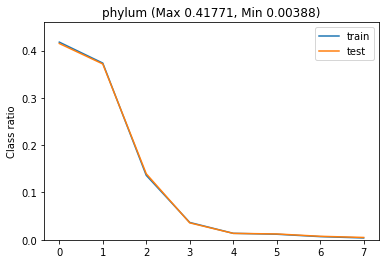

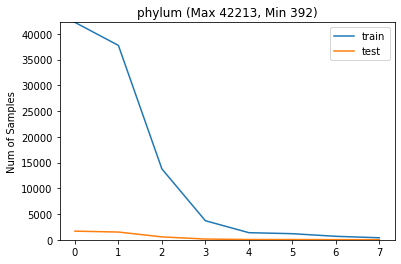

In [28]:
plot_labeled('phylum')
plot_labeled('phylum', plot_type='sample')

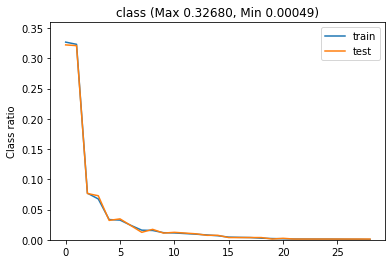

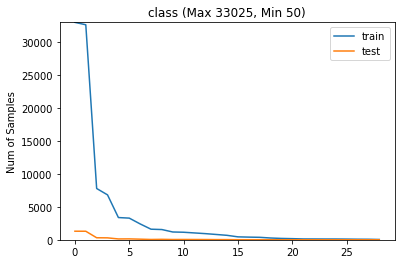

In [29]:
plot_labeled('class')
plot_labeled('class', plot_type='sample')

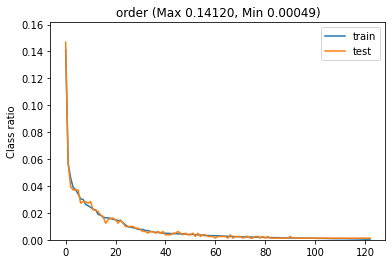

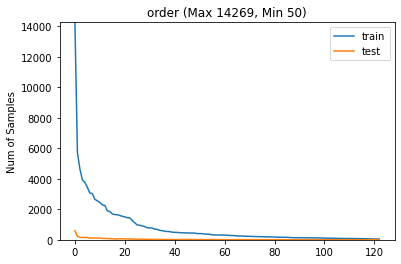

In [30]:
plot_labeled('order')
plot_labeled('order', plot_type='sample')

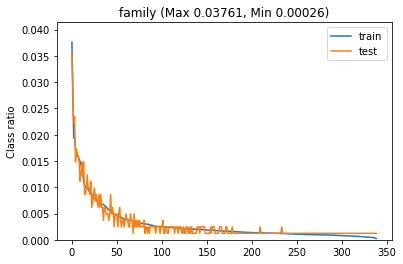

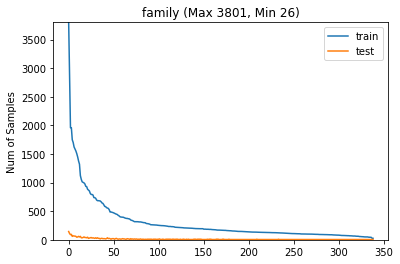

In [31]:
plot_labeled('family')
plot_labeled('family', plot_type='sample')

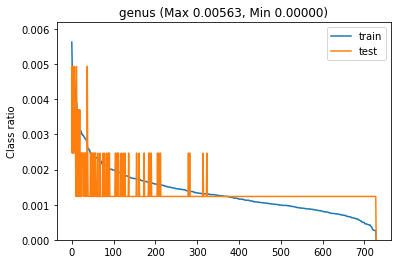

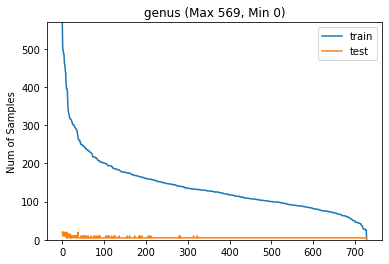

In [32]:
plot_labeled('genus')
plot_labeled('genus', plot_type='sample')

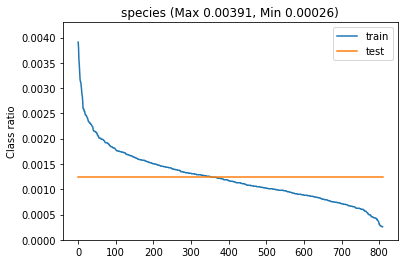

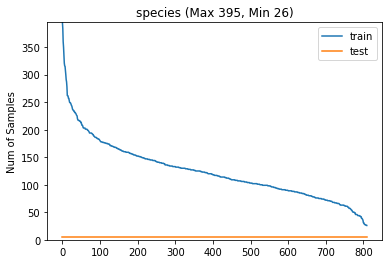

In [33]:
plot_labeled('species')
plot_labeled('species', plot_type='sample')

In [13]:
import merge_inat_species, setups
def plot_hierarchy(trees, tp_idx=0):
    assert tp_idx < len(trees)
    nodes = merge_inat_species.flatten_tree(trees[tp_idx])
    nodes = deepcopy(nodes)

    sorted_nodes = sorted(nodes, key=lambda n: len(n.samples), reverse=True)
    
    plot_curve = {
        'train' : [len(n.samples) for n in sorted_nodes],
    }
    
    colors = ['red']
    for idx, curve_name in enumerate(plot_curve):
        curve = plot_curve[curve_name]
        color = colors[idx]
        plt.plot(curve, label=curve_name)
    
#     plt.xticks(list(range(len(sorted_nodes))))
    max_count = plot_curve['train'][0]
    min_count = plot_curve['train'][-1]
    plt.ylabel('Num of Samples')
    plt.ylim(0, max_count + 10)
    plt.title(f"{len(nodes)} catgories (after merging) (Max {max_count}, Min {min_count})")
    plt.legend()
    plt.show()

In [14]:

data_dir = '/scratch/leco/'
setup = setups.SETUPS['semi_inat_weakaug']
print(f"==> Preparing {setup.dataset_name} data..")
dataset = getattr(merge_inat_species, setup.dataset_name)(data_dir, nums_of_leaf=list(range(3, 811)))
all_tp_info, leaf_idx_to_all_class_idx = dataset.get_class_hierarchy()

==> Preparing SemiInat2021WeakAug data..
/scratch/leco/semi_inat already exists.
Merge Egira and Xanthia to 0 with total 70 samples
Merge Herminia and Forsebia to 1 with total 75 samples
Merge Hydriomena and Lambdina to 2 with total 87 samples
Merge Macaria graphidaria and Macaria minorata to 3 with total 90 samples
Merge Epidendrum and Eriochilus to 4 with total 90 samples
Merge Glehnia and Seseli to 5 with total 93 samples
Merge Hada and Psaphida to 6 with total 96 samples
Merge Erynnis and Trapezites to 7 with total 100 samples
Merge Loxostegopsis and Heortia to 8 with total 105 samples
Merge Kleinia and Senecio to 9 with total 108 samples
Merge Scaphiopodidae and Ranidae to 10 with total 110 samples
Merge Aleeta and Yoyetta to 11 with total 111 samples
Merge Diplacodes and Rhodothemis to 12 with total 114 samples
Merge Heterodermia and Physcia to 13 with total 115 samples
Merge Dichomeris and Metzneria to 14 with total 116 samples
Merge Xanthorrhoea and Caesia to 15 with total 116 

Merge Rhizophoraceae and Salicaceae to 132 with total 202 samples
Merge Salmoniformes and Aulopiformes to 133 with total 203 samples
Merge Cheilanthes and Vittaria to 134 with total 203 samples
Merge Hypericum crux-andreae and Hypericum hirsutum to 135 with total 204 samples
Merge Cosmorhoe and Lycia to 136 with total 205 samples
Merge Satyrium and Calochilus to 137 with total 205 samples
Merge Ostreida and Venerida to 138 with total 206 samples
Merge Polygala curtissii and Polygala cruciata to 139 with total 206 samples
Merge Acmispon and Aspalathus to 140 with total 206 samples
Merge Ceanothus and Ziziphus to 141 with total 207 samples
Merge Saxifraga and Heuchera to 142 with total 208 samples
Merge new_6 and Mamestra to 143 with total 209 samples
Merge Architaenioglossa and Neogastropoda to 144 with total 209 samples
Merge Leptodactylidae and new_10 to 145 with total 210 samples
Merge Caliciaceae and Physciaceae to 146 with total 211 samples
Merge Chrysopidae and Hemerobiidae to 147

Merge Leucosarcia and Zenaida to 262 with total 271 samples
Merge Melaleuca quinquenervia and Melaleuca viminalis to 263 with total 271 samples
Merge Neolema and Lilioceris to 264 with total 272 samples
Merge Byblia and Acraea to 265 with total 273 samples
Merge Cryptoblepharus and Trachylepis to 266 with total 274 samples
Merge Pulicaria and Petasites to 267 with total 274 samples
Merge Micranthes and Bergenia to 268 with total 274 samples
Merge Hesperia and new_50 to 269 with total 275 samples
Merge Coliiformes and Caprimulgiformes to 270 with total 276 samples
Merge Violaceae and Chrysobalanaceae to 271 with total 276 samples
Merge new_27 and Sesiidae to 272 with total 277 samples
Merge Vachellia caven and Vachellia xanthophloea to 273 with total 277 samples
Merge Paeoniaceae and Hamamelidaceae to 274 with total 277 samples
Merge Satyrium and new_46 to 275 with total 278 samples
Merge Lycidae and Elateridae to 276 with total 278 samples
Merge Coronella and Masticophis to 277 with to

Merge Ptyas and Hemorrhois to 391 with total 351 samples
Merge Ononis and Dipogon to 392 with total 351 samples
Merge Baeometra and Wurmbea to 393 with total 351 samples
Merge Lambertia and new_120 to 394 with total 354 samples
Merge Cosmetidae and Sclerosomatidae to 395 with total 355 samples
Merge new_80 and Phyllotopsidaceae to 396 with total 356 samples
Merge Tagiades and new_112 to 397 with total 357 samples
Merge Eupithecia and new_103 to 398 with total 357 samples
Merge Lycaena and new_109 to 399 with total 357 samples
Merge Colletidae and Halictidae to 400 with total 357 samples
Merge Mobulidae and Dasyatidae to 401 with total 357 samples
Merge new_35 and new_177 to 402 with total 357 samples
Merge Chauliognathus and Cantharis to 403 with total 358 samples
Merge Euthamia and new_93 to 404 with total 358 samples
Merge Platycladus and Cryptomeria to 405 with total 358 samples
Merge Tipulidae and Cecidomyiidae to 406 with total 359 samples
Merge Lygaeidae and Alydidae to 407 with 

Merge Pseudoedophrys and new_332 to 527 with total 524 samples
Merge Melanthiaceae and Colchicaceae to 528 with total 524 samples
Merge new_228 and new_265 to 529 with total 526 samples
Merge Hierodula and new_297 to 530 with total 527 samples
Merge new_166 and new_334 to 531 with total 535 samples
Merge Rosalia and new_328 to 532 with total 536 samples
Merge Peponapis and new_281 to 533 with total 538 samples
Merge new_251 and Scincidae to 534 with total 539 samples
Merge Laridae and new_352 to 535 with total 539 samples
Merge new_258 and Melaleuca to 536 with total 539 samples
Merge new_253 and new_267 to 537 with total 540 samples
Merge Gnetopsida and Pinopsida to 538 with total 540 samples
Merge new_255 and Malvaceae to 539 with total 544 samples
Merge Asphodelaceae and Iridaceae to 540 with total 544 samples
Merge new_218 and new_313 to 541 with total 549 samples
Merge Solanum torvum and new_337 to 542 with total 550 samples
Merge Vachellia and new_279 to 543 with total 555 sample

Merge Cactaceae and new_578 to 669 with total 1110 samples
Merge new_494 and Polypodiales to 670 with total 1111 samples
Merge new_512 and new_563 to 671 with total 1114 samples
Merge Sedum and new_569 to 672 with total 1125 samples
Merge new_492 and new_577 to 673 with total 1134 samples
Merge new_500 and new_575 to 674 with total 1135 samples
Merge new_537 and new_560 to 675 with total 1143 samples
Merge new_487 and new_592 to 676 with total 1155 samples
Merge new_549 and Fagales to 677 with total 1173 samples
Merge Charadriiformes and new_571 to 678 with total 1174 samples
Merge Apidae and Vespidae to 679 with total 1177 samples
Merge new_526 and Crambidae to 680 with total 1186 samples
Merge new_519 and new_587 to 681 with total 1188 samples
Merge Mantodea and Odonata to 682 with total 1189 samples
Merge new_529 and new_589 to 683 with total 1205 samples
Merge Pittosporaceae and Apiaceae to 684 with total 1214 samples
Merge new_505 and new_604 to 685 with total 1230 samples
Merge L

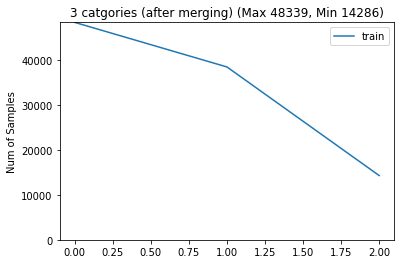

In [15]:
plot_hierarchy(dataset.tp_hierarchy, tp_idx=0)

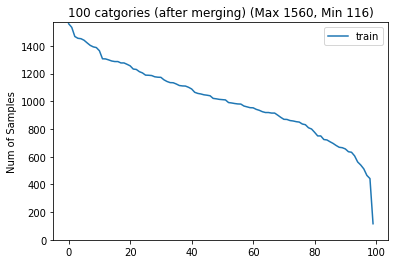

In [16]:
plot_hierarchy(dataset.tp_hierarchy, tp_idx=97)

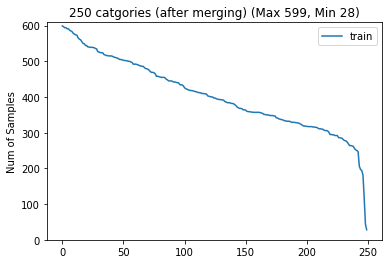

In [17]:
plot_hierarchy(dataset.tp_hierarchy, tp_idx=247)

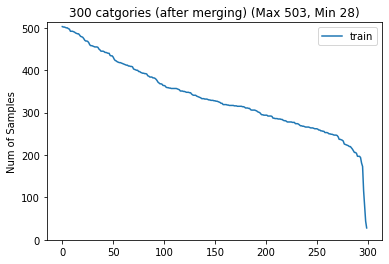

In [18]:
plot_hierarchy(dataset.tp_hierarchy, tp_idx=297)

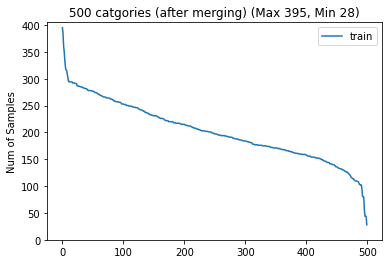

In [19]:
plot_hierarchy(dataset.tp_hierarchy, tp_idx=497)